### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_preprocessed_2.csv')

In [3]:
test = pd.read_csv('test_preprocessed_2.csv')

In [4]:
train.shape

(304531, 74)

In [5]:
train.duplicated().sum()

0

In [6]:
train['SK_ID_CURR'].nunique()

304531

In [7]:
train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier
98594,215566,0,Cash loans,M,Y,Y,0,360000.0,1467612.0,58203.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
28430,133374,0,Cash loans,F,N,Y,0,202500.0,755190.0,33394.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
242323,383166,0,Cash loans,M,Y,Y,0,171000.0,521280.0,31630.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,0
172283,301585,0,Cash loans,F,N,Y,0,157500.0,261751.5,17950.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
211849,347879,0,Cash loans,M,Y,Y,0,103500.0,269550.0,13761.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0


In [8]:
train['is_outlier'].value_counts()

is_outlier
0    289304
1     15227
Name: count, dtype: int64

In [9]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [10]:
# extract numerical and categorical columns
num_cols = [col for col in train.columns if train[col].dtype != 'object']
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

In [11]:
# drop SK_ID_CURR and TARGET from num_cols
num_cols = [col for col in num_cols if col not in ['SK_ID_CURR', 'TARGET']]

In [12]:
train[num_cols].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,1.0,0.0,0.0,2.0,2.0,3.0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
train[cat_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [14]:
train[num_cols].columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10'

In [15]:
train['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     213277
1      60520
2      26502
3       3680
4        426
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [16]:
train[train['CNT_CHILDREN'] == 19]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier
153874,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0
263223,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


### Univariate Analysis

In [17]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [18]:
train['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276613
Revolving loans     27918
Name: count, dtype: int64

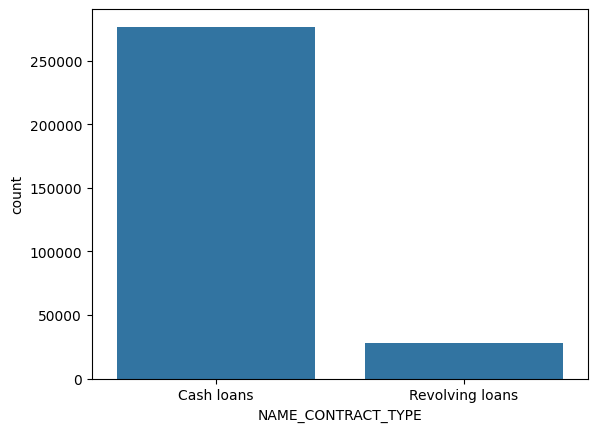

In [19]:
# Count plot of NAME_CONTRACT_TYPE
sns.countplot(x='NAME_CONTRACT_TYPE', data=train)
plt.show()

In [20]:
train['CODE_GENDER'].value_counts()

CODE_GENDER
F      200482
M      104045
XNA         4
Name: count, dtype: int64

In [21]:
# drop XNA from CODE_GENDER
train = train[train['CODE_GENDER'] != 'XNA']
train['CODE_GENDER'].value_counts()

CODE_GENDER
F    200482
M    104045
Name: count, dtype: int64

In this dataset female has applied two times more than male

In [22]:
train['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    200908
Y    103619
Name: count, dtype: int64

In [23]:
train['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    211637
N     92890
Name: count, dtype: int64

In [24]:
# histogram of AMT_INCOME_TOTAL
train['AMT_INCOME_TOTAL'].value_counts()

AMT_INCOME_TOTAL
135000.0    35417
112500.0    30699
157500.0    26337
180000.0    24499
90000.0     22231
            ...  
109170.0        1
343890.0        1
433350.0        1
107500.5        1
113062.5        1
Name: count, Length: 2512, dtype: int64

In [25]:
# AMT_INCOME_TOTAL float to int
train['AMT_INCOME_TOTAL'] = train['AMT_INCOME_TOTAL'].astype(int)

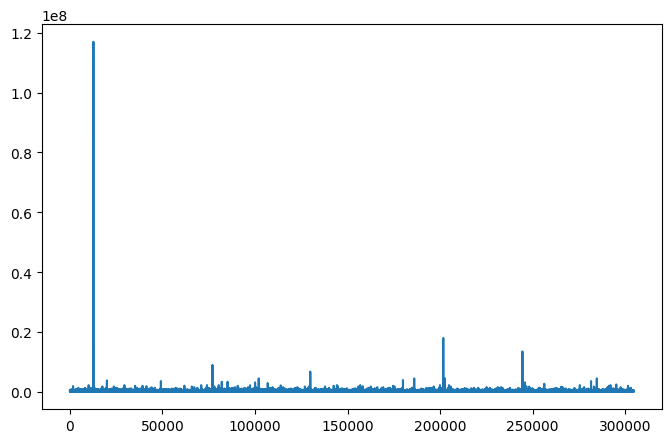

In [26]:
# line plot of AMT_INCOME_TOTAL
plt.figure(figsize=(8,5))
train['AMT_INCOME_TOTAL'].plot(kind='line')
plt.show()

In [27]:
train['AMT_INCOME_TOTAL'].min()

25650

In [28]:
train['AMT_INCOME_TOTAL'].max()

117000000

In [29]:
train[train['AMT_INCOME_TOTAL'] == 117000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier
12702,114967,1,Cash loans,F,N,Y,1,117000000,562491.0,26194.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [30]:
train.drop('is_outlier', axis=1, inplace=True)

In [31]:
train.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# IQR of AMT_INCOME_TOTAL
Q1 = train['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = train['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
# New columns is_outlier_Income based on IQR of AMT_INCOME_TOTAL
train['is_outlier_Income'] = train['AMT_INCOME_TOTAL'].apply(lambda x: 1 if x < Q1 - 1.5 * IQR or x > Q3 + 1.5 * IQR else 0)

In [34]:
train[train['is_outlier_Income'] == 1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier_Income
7,100010,0,Cash loans,M,Y,Y,0,360000,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
22,100026,0,Cash loans,F,N,N,1,450000,497520.0,32521.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1
33,100039,0,Cash loans,M,Y,N,1,360000,733315.5,39069.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1
49,100056,0,Cash loans,M,Y,Y,0,360000,1506816.0,49927.5,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1
51,100059,0,Cash loans,M,Y,Y,1,540000,675000.0,34596.0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304480,456199,0,Cash loans,M,Y,N,1,382500,745429.5,24354.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,1
304497,456217,0,Cash loans,F,N,Y,0,360000,796396.5,38443.5,...,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0,1
304504,456228,0,Cash loans,F,Y,N,0,540000,545040.0,35617.5,...,0,0,0,0.0,0.0,0.0,2.0,0.0,3.0,1
304512,456236,0,Cash loans,M,Y,Y,0,585000,1575000.0,43443.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
# IQR of AMT_CREDIT
Q1 = train['AMT_CREDIT'].quantile(0.25)
Q3 = train['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

In [36]:
# New columns is_outlier_Credit based on IQR of AMT_CREDIT
train['is_outlier_Credit'] = train['AMT_CREDIT'].apply(lambda x: 1 if x < Q1 - 1.5 * IQR or x > Q3 + 1.5 * IQR else 0)

In [37]:
train[train['is_outlier_Credit'] == 1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier_Income,is_outlier_Credit
60,100071,0,Cash loans,F,N,Y,0,180000,1663987.5,86989.5,...,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0,1
133,100157,0,Cash loans,M,N,Y,0,180000,1755000.0,61132.5,...,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0,1
187,100219,0,Cash loans,M,N,Y,1,315000,2250000.0,83515.5,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0,1
233,100273,1,Cash loans,F,N,Y,0,157500,1710000.0,66262.5,...,0,0,0.0,1.0,0.0,1.0,1.0,2.0,0,1
312,100361,0,Cash loans,M,N,Y,0,270000,1800000.0,62698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304238,455924,0,Cash loans,F,Y,Y,0,225000,1827549.0,50386.5,...,0,0,1.0,1.0,0.0,2.0,2.0,4.0,0,1
304274,455969,0,Cash loans,M,Y,N,0,292500,1724220.0,50544.0,...,0,0,0.0,0.0,0.0,0.0,2.0,0.0,0,1
304422,456134,0,Cash loans,F,Y,Y,0,135000,1718473.5,47385.0,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
304442,456155,0,Cash loans,F,N,Y,0,202500,1971072.0,68643.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [38]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [39]:
def add_iqr_outlier_flag(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[f'is_outlier_{column.lower()}'] = ((df[column] < lower) | (df[column] > upper)).astype(int)


In [40]:
add_iqr_outlier_flag(train, 'AMT_REQ_CREDIT_BUREAU_HOUR')


In [41]:
train[train['is_outlier_amt_req_credit_bureau_hour'] == 1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier_Income,is_outlier_Credit,is_outlier_amt_req_credit_bureau_hour
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,...,0,1.0,0.0,0.0,2.0,2.0,3.0,0,0,1
14,100018,0,Cash loans,F,N,Y,0,189000,773680.5,32778.0,...,0,1.0,0.0,1.0,0.0,2.0,2.0,0,0,1
20,100024,0,Revolving loans,M,Y,Y,0,135000,427500.0,21375.0,...,0,1.0,1.0,1.0,2.0,1.0,0.0,0,0,1
34,100040,0,Cash loans,F,N,Y,0,135000,1125000.0,32895.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,0,0,1
49,100056,0,Cash loans,M,Y,Y,0,360000,1506816.0,49927.5,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304484,456204,0,Cash loans,F,N,Y,0,58500,528633.0,27121.5,...,0,1.0,1.0,0.0,2.0,0.0,2.0,0,0,1
304486,456206,0,Cash loans,F,N,Y,0,157500,599778.0,26550.0,...,0,1.0,0.0,1.0,2.0,1.0,1.0,0,0,1
304524,456248,0,Cash loans,F,N,Y,0,153000,331920.0,16096.5,...,0,1.0,0.0,0.0,1.0,2.0,2.0,0,0,1
304526,456251,0,Cash loans,M,N,N,0,157500,254700.0,27558.0,...,0,1.0,0.0,1.0,0.0,2.0,2.0,0,0,1


In [42]:
add_iqr_outlier_flag(train, 'AMT_REQ_CREDIT_BUREAU_DAY')
add_iqr_outlier_flag(train, 'AMT_REQ_CREDIT_BUREAU_WEEK')
add_iqr_outlier_flag(train, 'AMT_REQ_CREDIT_BUREAU_MON')
add_iqr_outlier_flag(train, 'AMT_REQ_CREDIT_BUREAU_QRT')
add_iqr_outlier_flag(train, 'AMT_REQ_CREDIT_BUREAU_YEAR')

In [43]:
train[train['is_outlier_amt_req_credit_bureau_mon'] == 1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier_Income,is_outlier_Credit,is_outlier_amt_req_credit_bureau_hour,is_outlier_amt_req_credit_bureau_day,is_outlier_amt_req_credit_bureau_week,is_outlier_amt_req_credit_bureau_mon,is_outlier_amt_req_credit_bureau_qrt,is_outlier_amt_req_credit_bureau_year
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,...,2.0,3.0,0,0,1,0,0,1,0,0
6,100009,0,Cash loans,F,Y,Y,1,171000,1560726.0,41301.0,...,1.0,2.0,0,0,0,0,0,1,0,0
9,100012,0,Revolving loans,M,N,Y,0,135000,405000.0,20250.0,...,2.0,1.0,0,0,0,1,1,1,0,0
10,100014,0,Cash loans,F,N,Y,1,112500,652500.0,21177.0,...,0.0,0.0,0,0,0,0,0,1,0,0
12,100016,0,Cash loans,F,N,Y,0,67500,80865.0,5881.5,...,0.0,0.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304524,456248,0,Cash loans,F,N,Y,0,153000,331920.0,16096.5,...,2.0,2.0,0,0,1,0,0,1,0,0
304525,456249,0,Cash loans,F,N,Y,0,112500,225000.0,22050.0,...,0.0,0.0,0,0,0,0,0,1,0,0
304527,456252,0,Cash loans,F,N,Y,0,72000,269550.0,12001.5,...,1.0,1.0,0,0,0,0,1,1,0,0
304528,456253,0,Cash loans,F,N,Y,0,153000,677664.0,29979.0,...,0.0,1.0,0,0,1,0,0,1,0,0


In [44]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### Bivariate Analysis

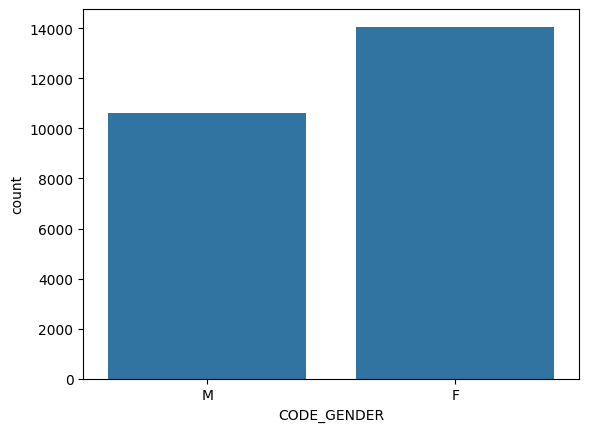

In [46]:
# plot gender when target is 1
sns.countplot(x='CODE_GENDER', data=train[train['TARGET'] == 1])
plt.show()

In [48]:
train['CODE_GENDER'].value_counts()

CODE_GENDER
F    200482
M    104045
Name: count, dtype: int64

In [49]:
train[train['TARGET'] == 1]['CODE_GENDER'].value_counts()

CODE_GENDER
F    14063
M    10604
Name: count, dtype: int64

In [52]:
# percentage
(14063/200482)*100

7.014594826468211

As per data there are 7 % of females who are defaulters

In [54]:
(10604/104045)*100

10.191743956941709

The Number of males are less in the dataset however they are more likely to default as there are 10 % of males who are defaulters

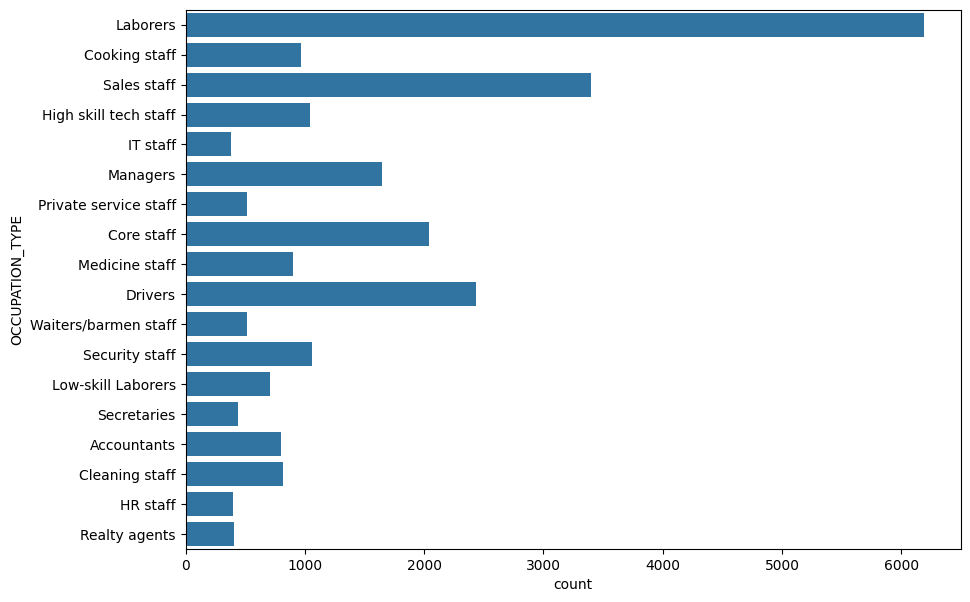

In [61]:
# Occupation_type when target is 1
plt.figure(figsize=(10,7))
sns.countplot(y='OCCUPATION_TYPE', data=train[train['TARGET'] == 1])
plt.show()

* Laborers,Sales staff,Drivers and Core staff are more likely to default
* So over all Low wage earners are more likely to default than high wage earners 

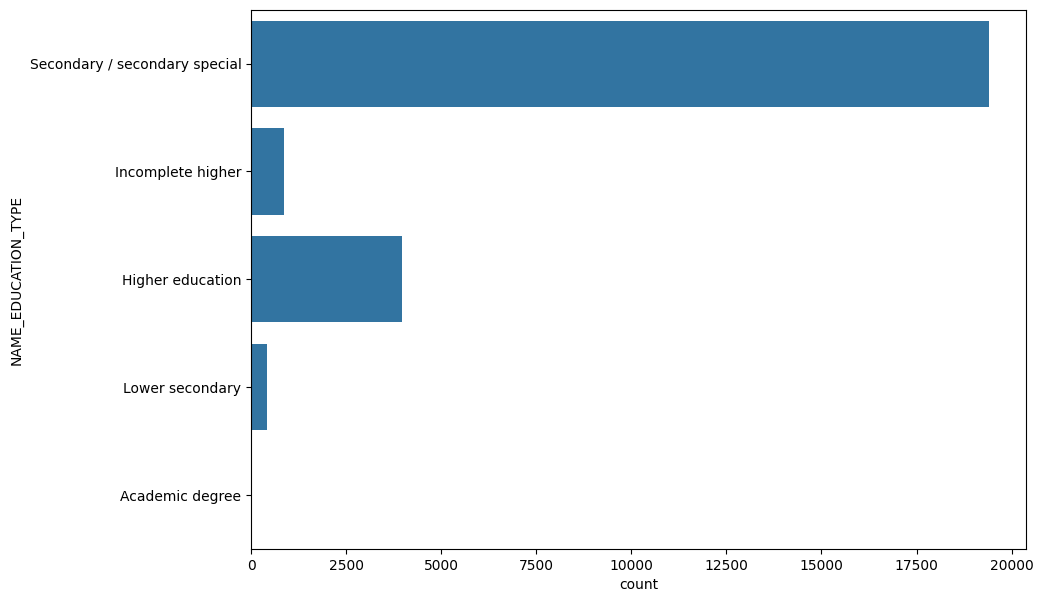

In [63]:
# Education_type when target is 1
plt.figure(figsize=(10,7))
sns.countplot(y='NAME_EDUCATION_TYPE', data=train[train['TARGET'] == 1])
plt.show()

* Secondary / secondary special  is most likely to default

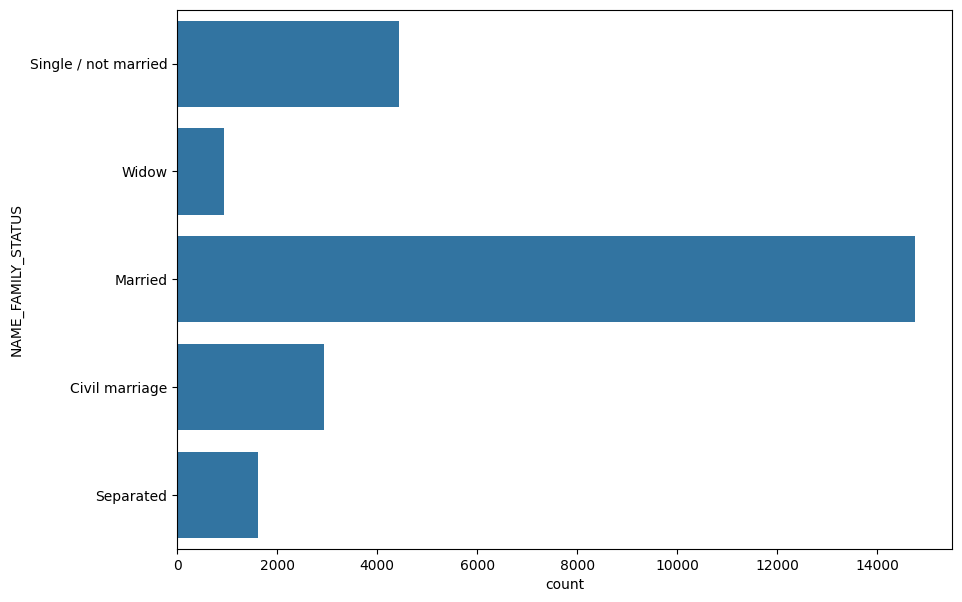

In [66]:
# Family_status when target is 1
plt.figure(figsize=(10,7))
sns.countplot(y='NAME_FAMILY_STATUS', data=train[train['TARGET'] == 1])
plt.show()

* Married peoples are more likely to default

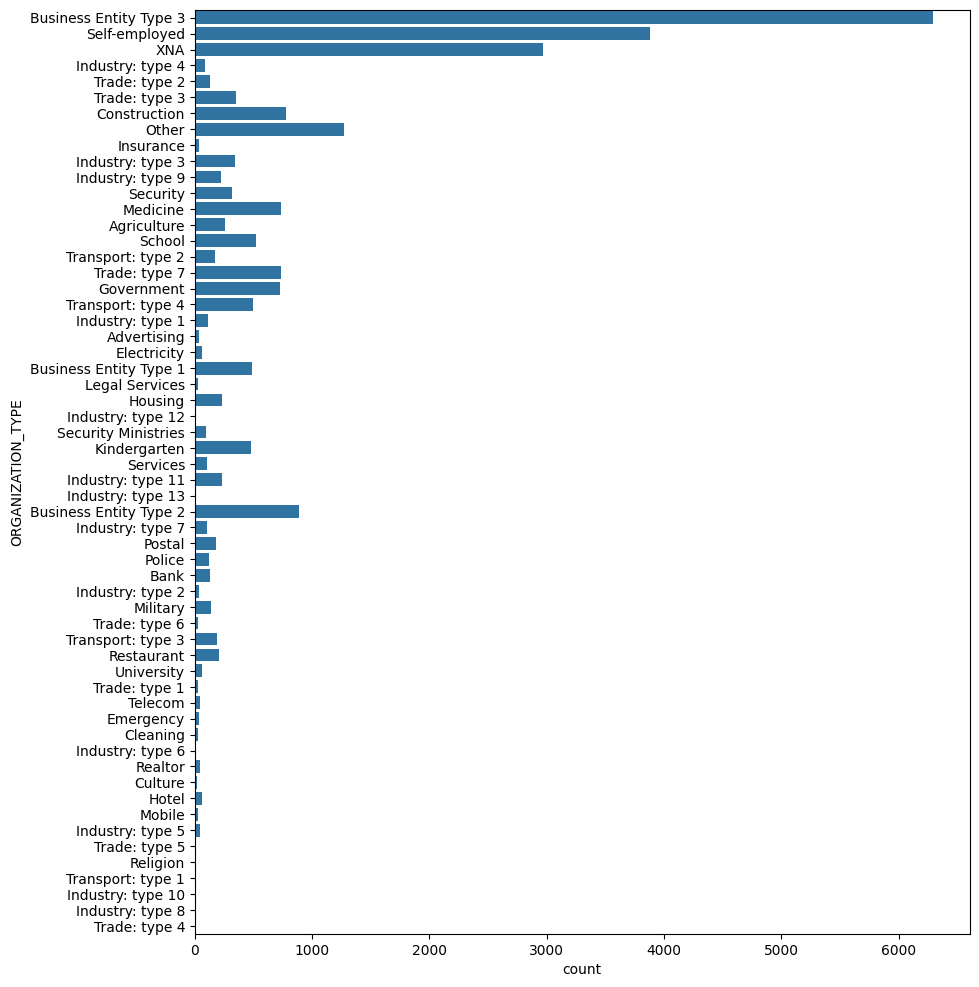

In [71]:
# Organization_type when target is 1 at least 1000 records
plt.figure(figsize=(10,12))
sns.countplot(y='ORGANIZATION_TYPE', data=train[train['TARGET'] == 1])
plt.show()


* Business entity type 3, self-employed and XNA are more likely to default

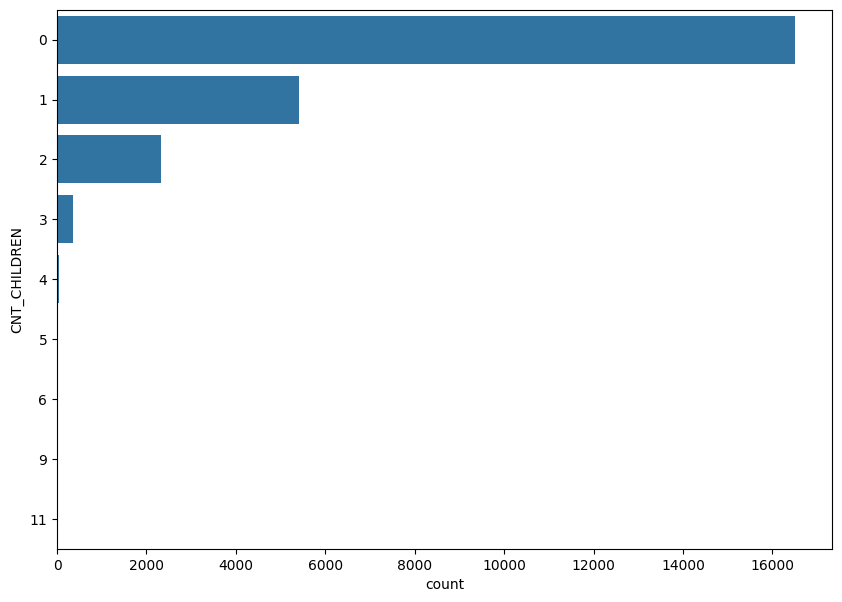

In [72]:
# Number of family members when target is 1
plt.figure(figsize=(10,7))
sns.countplot(y='CNT_CHILDREN', data=train[train['TARGET'] == 1])
plt.show()

* mostly the single people are more likely to default